# Data cleaning
(in colaboration with Joffrey Bienvenu)

#### Ici nous avons un dataset déjà trié par un collègue. Mon but ici est juste de repasser dessus pour qu'il corresponde à mes attentes

In [1]:
# importation des libs/datasets...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/immoCollect52c.csv', index_col=0)
df

,postal_code,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,...,swimming_pool,state_of_the_building,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
4,7912,0,550000,4,325,1,0,1,1,3570.0,...,0,good,Frasnes-lez-Anvaing,Ath,hainaut,6.0,wallonie,1.0,9.0,-1.488515
6,1650,0,525000,4,220,1,1,1,1,1600.0,...,0,good,Beersel,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.851322
9,1332,0,549000,4,210,1,0,1,1,2004.0,...,0,as new,Rixensart,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-3.410265
10,8310,0,519000,3,273,1,1,0,1,591.0,...,0,as new,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
12,8200,0,535000,4,200,1,0,1,1,559.0,...,0,as new,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59138,3210,0,495000,4,231,0,0,1,0,374.0,...,0,as new,Lubbeek,Leuven,brabant-flamand,5.0,flandre,0.0,2.0,-2.483942
59145,2310,0,468000,3,180,1,0,0,0,0.0,...,0,None,Rijkevorsel,Turnhout,anvers,2.0,flandre,0.0,22.0,-1.905413
59150,1800,0,454993,3,169,0,0,0,0,389.0,...,0,None,Vilvoorde,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.633313
59152,3530,0,475000,3,222,0,0,0,0,1124.0,...,0,None,Houthalen-Helchteren,Maaseik,limbourg,7.0,flandre,0.0,26.0,-2.208714


In [2]:
df.isna().sum()

postal_code                   0
type_of_property              0
price                         0
number_of_rooms               0
house_area                    0
fully_equipped_kitchen        0
open_fire                     0
terrace                       0
garden                        0
surface_of_the_land       23458
number_of_facades             0
swimming_pool                 0
state_of_the_building         0
locality                      0
district                      0
province                      0
province_int                  0
region                        0
region_int                    0
district_int                  0
ratio_free_build              0
dtype: int64

In [3]:
# 23k na from surface_of_the_land, i drop the collumn
df.drop(columns=['surface_of_the_land'],inplace=True)
# df.isna().sum()
df.shape

(44372, 20)

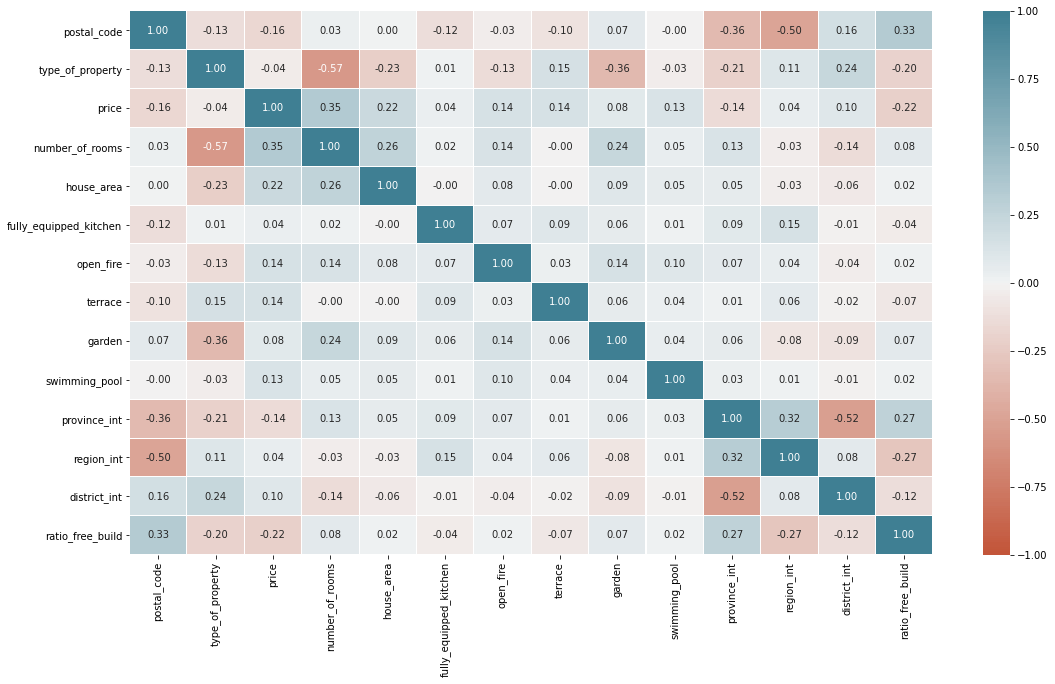

In [4]:
# Print the global heatmap
plt.subplots(figsize=(18, 10))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [5]:
df.dtypes

postal_code                 int64
type_of_property            int64
price                       int64
number_of_rooms             int64
house_area                  int64
fully_equipped_kitchen      int64
open_fire                   int64
terrace                     int64
garden                      int64
number_of_facades          object
swimming_pool               int64
state_of_the_building      object
locality                   object
district                   object
province                   object
province_int              float64
region                     object
region_int                float64
district_int              float64
ratio_free_build          float64
dtype: object

## SPLIT FOR APART CLEANING

In [6]:
df = df[df['type_of_property'] == 1]
df.drop(columns=['type_of_property'],inplace=True)

/home/leersla/Desktop/Turing4/ImmoEliza-API/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


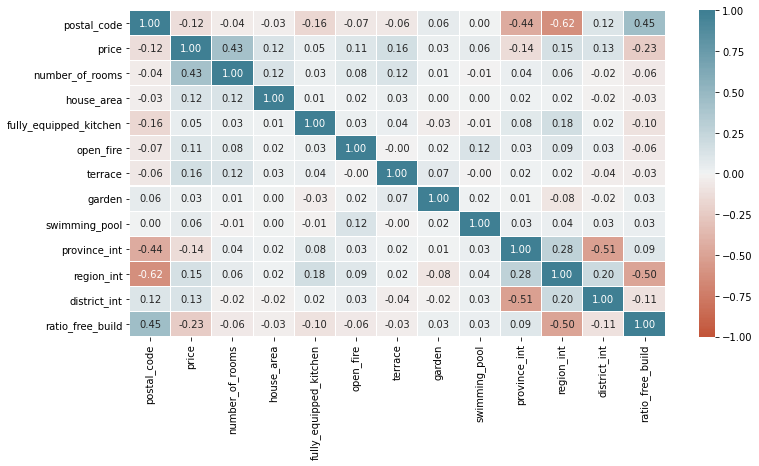

In [7]:
# Print the global heatmap
plt.subplots(figsize=(12, 6))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

#### Let's cleaning this for my model prediction !

In [8]:
for columnName in df.keys():
    print(df[columnName].value_counts())

1180    870
1000    858
8300    653
8400    596
1050    594
       ... 
8954      1
4351      1
4431      1
1701      1
4852      1
Name: postal_code, Length: 719, dtype: int64
199000    391
225000    329
235000    304
275000    298
295000    292
         ... 
306925      1
282353      1
288500      1
300794      1
214975      1
Name: price, Length: 2381, dtype: int64
2    13088
3     5019
1     4762
4      589
Name: number_of_rooms, dtype: int64
90     902
80     760
100    723
85     689
70     593
      ... 
298      1
378      1
305      1
273      1
319      1
Name: house_area, Length: 319, dtype: int64
1    16511
0     6947
Name: fully_equipped_kitchen, dtype: int64
0    23018
1      440
Name: open_fire, dtype: int64
1    16237
0     7221
Name: terrace, dtype: int64
0    20155
1     3303
Name: garden, dtype: int64
2       9528
None    9140
3       2423
4       2017
1        350
Name: number_of_facades, dtype: int64
0    23218
1      240
Name: swimming_pool, dtype: int64
as new   

In [9]:
# suppression des collonnes inutiles / contenant trop peu ou trop de valeurs manquantes
df.drop(columns=['open_fire'],inplace=True)
df.drop(columns=['number_of_facades'],inplace=True)
df.drop(columns=['swimming_pool'],inplace=True)
# df.drop(columns=['state_of_the_building'],inplace=True)

# Pour les apart pas besoin des jardins !
df.drop(columns=['garden'],inplace=True)



### Price

(array([   5.,   14.,   25.,  104.,  171.,  337.,  693.,  858., 1324.,
        1667., 1882., 1978., 1883., 1912., 1566., 1384.,  740.,  919.,
         716.,  601.,  671.,  230.,  347.,  459.,  308.,  359.,  162.,
         160.,  202.,  111.,  136.,  231.,   98.,  115.,  136.,   71.,
         145.,   15.,   47.,  144.,   64.,   85.,   19.,   49.,   77.,
          10.,   53.,   78.,   20.,   77.]),
 array([  2500.,  21450.,  40400.,  59350.,  78300.,  97250., 116200.,
        135150., 154100., 173050., 192000., 210950., 229900., 248850.,
        267800., 286750., 305700., 324650., 343600., 362550., 381500.,
        400450., 419400., 438350., 457300., 476250., 495200., 514150.,
        533100., 552050., 571000., 589950., 608900., 627850., 646800.,
        665750., 684700., 703650., 722600., 741550., 760500., 779450.,
        798400., 817350., 836300., 855250., 874200., 893150., 912100.,
        931050., 950000.]),
 <BarContainer object of 50 artists>)

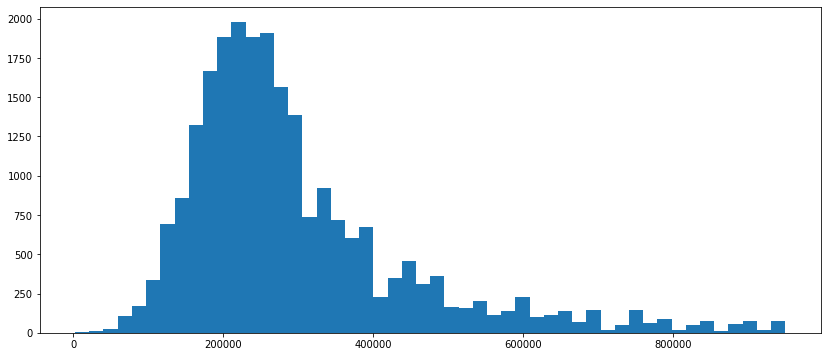

In [10]:
plt.figure(figsize=[14,6])
plt.hist(df['price'], 50)

(23458, 15)

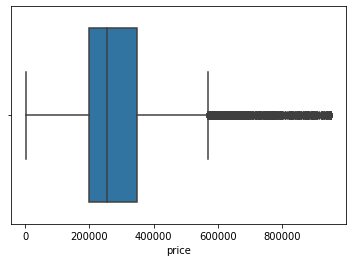

In [11]:
sns.boxplot(x=df['price'])
df.shape

(23423, 15)

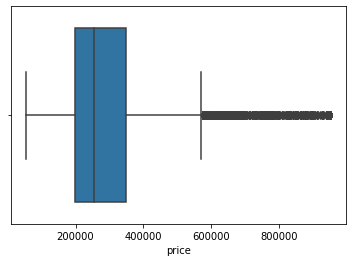

In [12]:
df = df[df['price'] > 50_000]
sns.boxplot(x=df['price'])
df.shape

(array([  81.,  127.,  215.,  532.,  670., 1071., 1424., 1467., 1909.,
        1818., 2204., 1523., 1351., 1325.,  762.,  927.,  594.,  607.,
         358.,  561.,  385.,  298.,  384.,  237.,  406.,   65.,  160.,
         201.,   91.,  156.,  213.,   96.,  115.,  113.,   92.,  142.,
          15.,   36.,  138.,   54.,   43.,   87.,   16.,   44.,   74.,
          32.,   79.,   28.,   20.,   77.]),
 array([ 54000.,  71920.,  89840., 107760., 125680., 143600., 161520.,
        179440., 197360., 215280., 233200., 251120., 269040., 286960.,
        304880., 322800., 340720., 358640., 376560., 394480., 412400.,
        430320., 448240., 466160., 484080., 502000., 519920., 537840.,
        555760., 573680., 591600., 609520., 627440., 645360., 663280.,
        681200., 699120., 717040., 734960., 752880., 770800., 788720.,
        806640., 824560., 842480., 860400., 878320., 896240., 914160.,
        932080., 950000.]),
 <BarContainer object of 50 artists>)

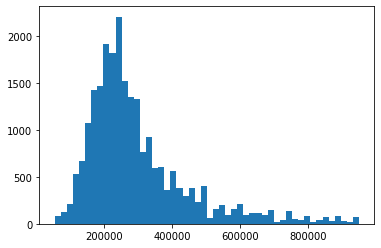

In [13]:
plt.hist(df['price'], 50)

### House area

(array([2.3422e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 3.17090e+03, 6.34080e+03, 9.51070e+03, 1.26806e+04,
        1.58505e+04, 1.90204e+04, 2.21903e+04, 2.53602e+04, 2.85301e+04,
        3.17000e+04]),
 <BarContainer object of 10 artists>)

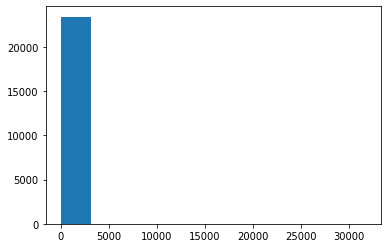

In [14]:
plt.hist(df['house_area'], 10)

(array([1.1836e+04, 1.0411e+04, 1.0080e+03, 1.2400e+02, 3.1000e+01,
        3.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 11. ,  94.9, 178.8, 262.7, 346.6, 430.5, 514.4, 598.3, 682.2,
        766.1, 850. ]),
 <BarContainer object of 10 artists>)

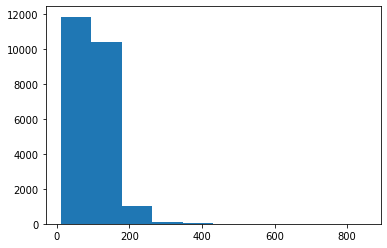

In [15]:
df = df[(df['house_area'] < 1000) & (df['house_area'] > 10)]
plt.hist(df['house_area'], 10)

<AxesSubplot:xlabel='house_area'>

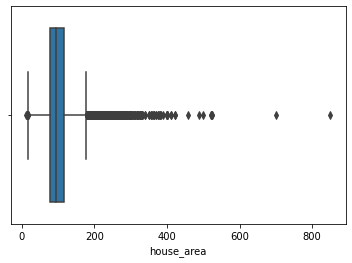

In [16]:
sns.boxplot(x=df['house_area'])

<AxesSubplot:xlabel='house_area'>

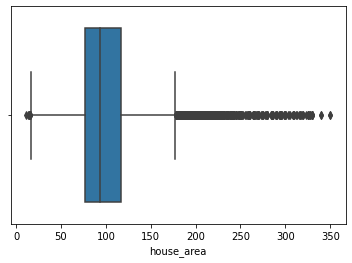

In [17]:
df = df[(df['house_area'] < 351) & (df['house_area'] > 10)]
sns.boxplot(x=df['house_area'])

(array([  608.,  5565., 10618.,  4095.,  1447.,   599.,   280.,    85.,
           58.,    26.]),
 array([ 11. ,  44.9,  78.8, 112.7, 146.6, 180.5, 214.4, 248.3, 282.2,
        316.1, 350. ]),
 <BarContainer object of 10 artists>)

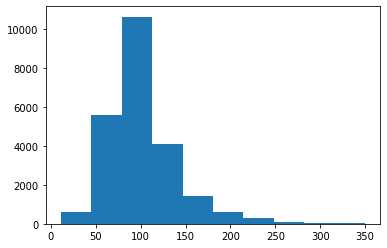

In [18]:
plt.hist(df['house_area'], 10)

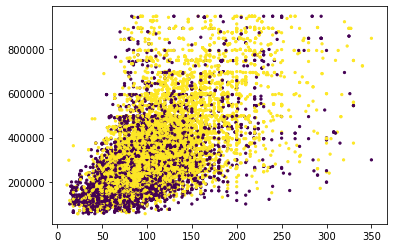

In [19]:
plt.scatter(df['house_area'],df['price'], c=df['terrace'], s=5)

## Number of rooms

In [20]:
df['number_of_rooms'].value_counts()

2    13062
3     5000
1     4747
4      572
Name: number_of_rooms, dtype: int64

## State of the building

In [21]:
# Transformation en deux nouveaux types "Bon état" et "A renover"

print(df['state_of_the_building'].value_counts())
print(df.shape)
df = df[df['state_of_the_building'] != "to restore"]
print(df.shape)

def is_new(element):
    if element == "as new" or element == "good":
        element = 1
        return element
    else: 
        element = 0
        return element
    

as new            9346
None              5809
good              5712
just renovated    1193
to be done up      868
to renovate        437
to restore          16
Name: state_of_the_building, dtype: int64
(23381, 15)
(23365, 15)


In [22]:
df['state_of_the_building'] = df['state_of_the_building'].apply(is_new)
df['state_of_the_building'].value_counts()

1    15058
0     8307
Name: state_of_the_building, dtype: int64

In [23]:
df = df.rename(columns = {'number_of_rooms': 'number_of_bedroom'}, inplace = False)
df = df.rename(columns = {'state_of_the_building': 'is_new'}, inplace = False)

## Un peu de visualisation (result)

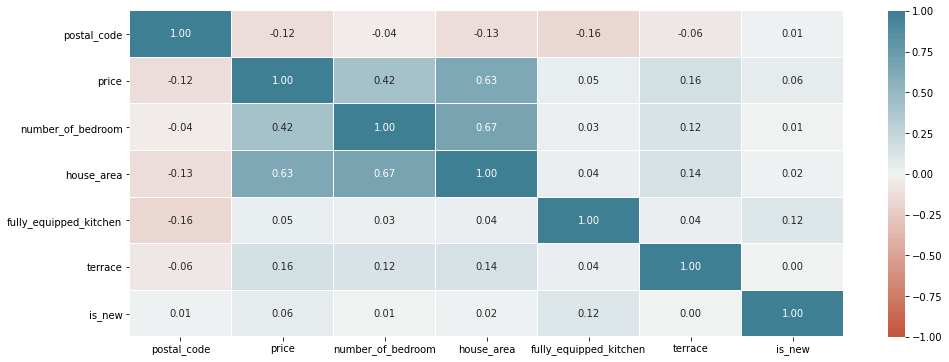

In [24]:
df_util = df.iloc[:,0:8]

# Print the heatmap
plt.subplots(figsize=(16, 6))   
sns.heatmap(df_util.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

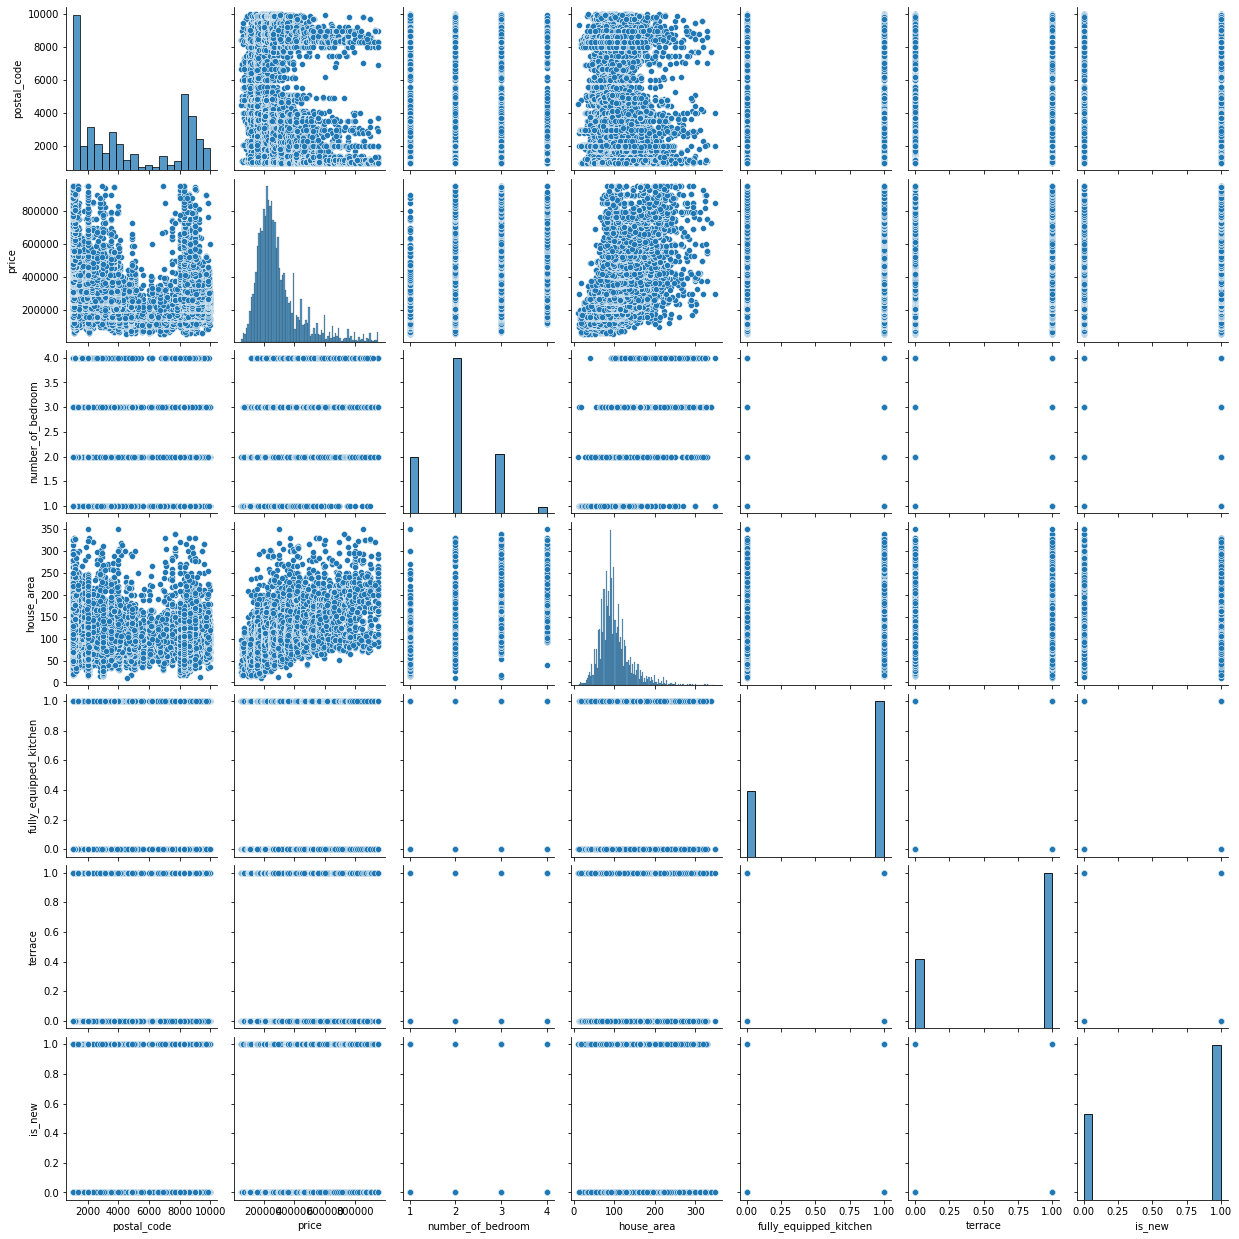

In [25]:
sns.pairplot(df_util)

In [26]:
df.dtypes

postal_code                 int64
price                       int64
number_of_bedroom           int64
house_area                  int64
fully_equipped_kitchen      int64
terrace                     int64
is_new                      int64
locality                   object
district                   object
province                   object
province_int              float64
region                     object
region_int                float64
district_int              float64
ratio_free_build          float64
dtype: object

In [27]:
df.shape

(23365, 15)

In [28]:
print(df['price'].mean())

297071.480590627


## Export

In [29]:
df.to_csv('./dataset/immoCollect52apart-clean.csv')